# Final Project
## Kinnick Fox
## DSC630

In [36]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("lego_sets.csv")

In [3]:
data.drop_duplicates("set_name",inplace=True)

In [4]:
data = data[data.country == "US"]

In [5]:
data = data.drop(["num_reviews","play_star_rating","prod_desc","prod_id","prod_long_desc","set_name","star_rating","val_star_rating","country"],axis=1)

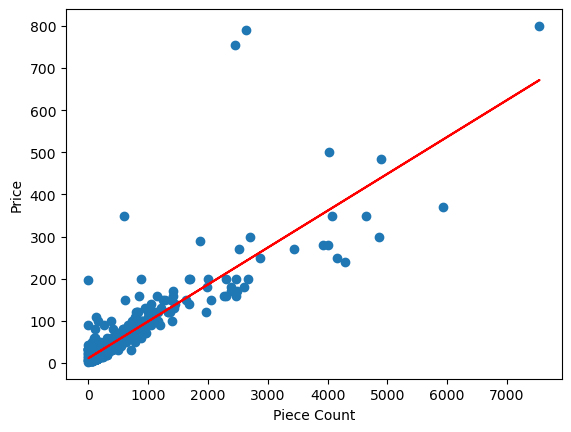

In [6]:
plt.scatter(data.piece_count,data.list_price)
plt.xlabel("Piece Count")
plt.ylabel("Price")
z = np.polyfit(data.piece_count,data.list_price, 1)
p = np.poly1d(z)
plt.plot(data.piece_count, p(data.piece_count), color="red")
plt.show()

In [7]:
# correlation coefficient between piece count and price
data.list_price.corr(data.piece_count)

0.8601670140995636

In [8]:
# beginning of the the initial modeling process
features = ["piece_count","theme_name","ages","review_difficulty"]

In [9]:
x = data[features]

In [10]:
y = data["list_price"]

In [11]:
# encoding required due to catagorical features being present
encoder = preprocessing.OneHotEncoder()
encoder.fit(x)
x = encoder.transform(x)

In [12]:
# labeling required due to target feature being continuous
label = preprocessing.LabelEncoder()
encoded_y = label.fit_transform(y)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, encoded_y, test_size=0.2)

In [14]:
dtc = DecisionTreeClassifier()

In [15]:
dtc = dtc.fit(x_train,y_train)

In [16]:
y_prediction = dtc.predict(x_test)
metrics.accuracy_score(y_test, y_prediction) # poor result

0.3076923076923077

In [17]:
# the same process with some features removed
x = data[["piece_count","theme_name"]]
encoder = preprocessing.OneHotEncoder()
encoder.fit(x)
x = encoder.transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, encoded_y, test_size=0.2)

In [18]:
dtc = DecisionTreeClassifier()
dtc = dtc.fit(x_train,y_train)

In [19]:
y_prediction = dtc.predict(x_test)
metrics.accuracy_score(y_test, y_prediction) # poor result

0.23076923076923078

In [20]:
# attempt to bin target variable to improve accuracy and remove need for labeling
bin_list=[]
for i in range(20,800,20):
    bin_list.append(str(i-20)+"-"+str(i))

In [21]:
# creation of more readable labels to mirror bins
data.list_price = pd.cut(x = data.list_price,
                         bins = range(0,800,20),
                         labels=bin_list)

data.dropna(inplace=True)
x = data[features]
encoder = preprocessing.OneHotEncoder()
encoder.fit(x)
x = encoder.transform(x)
y = data.list_price

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [23]:
dtc = DecisionTreeClassifier()
dtc = dtc.fit(x_train,y_train)

In [24]:
y_prediction = dtc.predict(x_test)
metrics.accuracy_score(y_test, y_prediction) # slightly better result

0.35537190082644626

In [25]:
# same proccess but with wider bins to increase accuracy
data = pd.read_csv("lego_sets.csv")
data.drop_duplicates("set_name",inplace=True)
data = data[data.country == "US"]
bin_list=[]
for i in range(50,800,50):
    bin_list.append(str(i-50)+"-"+str(i))
data.list_price = pd.cut(x = data.list_price,
                         bins = range(0,800,50),
                         labels=bin_list)

data.dropna(inplace=True)
x = data[features]
encoder = preprocessing.OneHotEncoder()
encoder.fit(x)
x = encoder.transform(x)
y = data.list_price

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [27]:
dtc = DecisionTreeClassifier()
dtc = dtc.fit(x_train,y_train)

In [28]:
y_prediction = dtc.predict(x_test)
metrics.accuracy_score(y_test, y_prediction) # best accuracy

0.7627118644067796

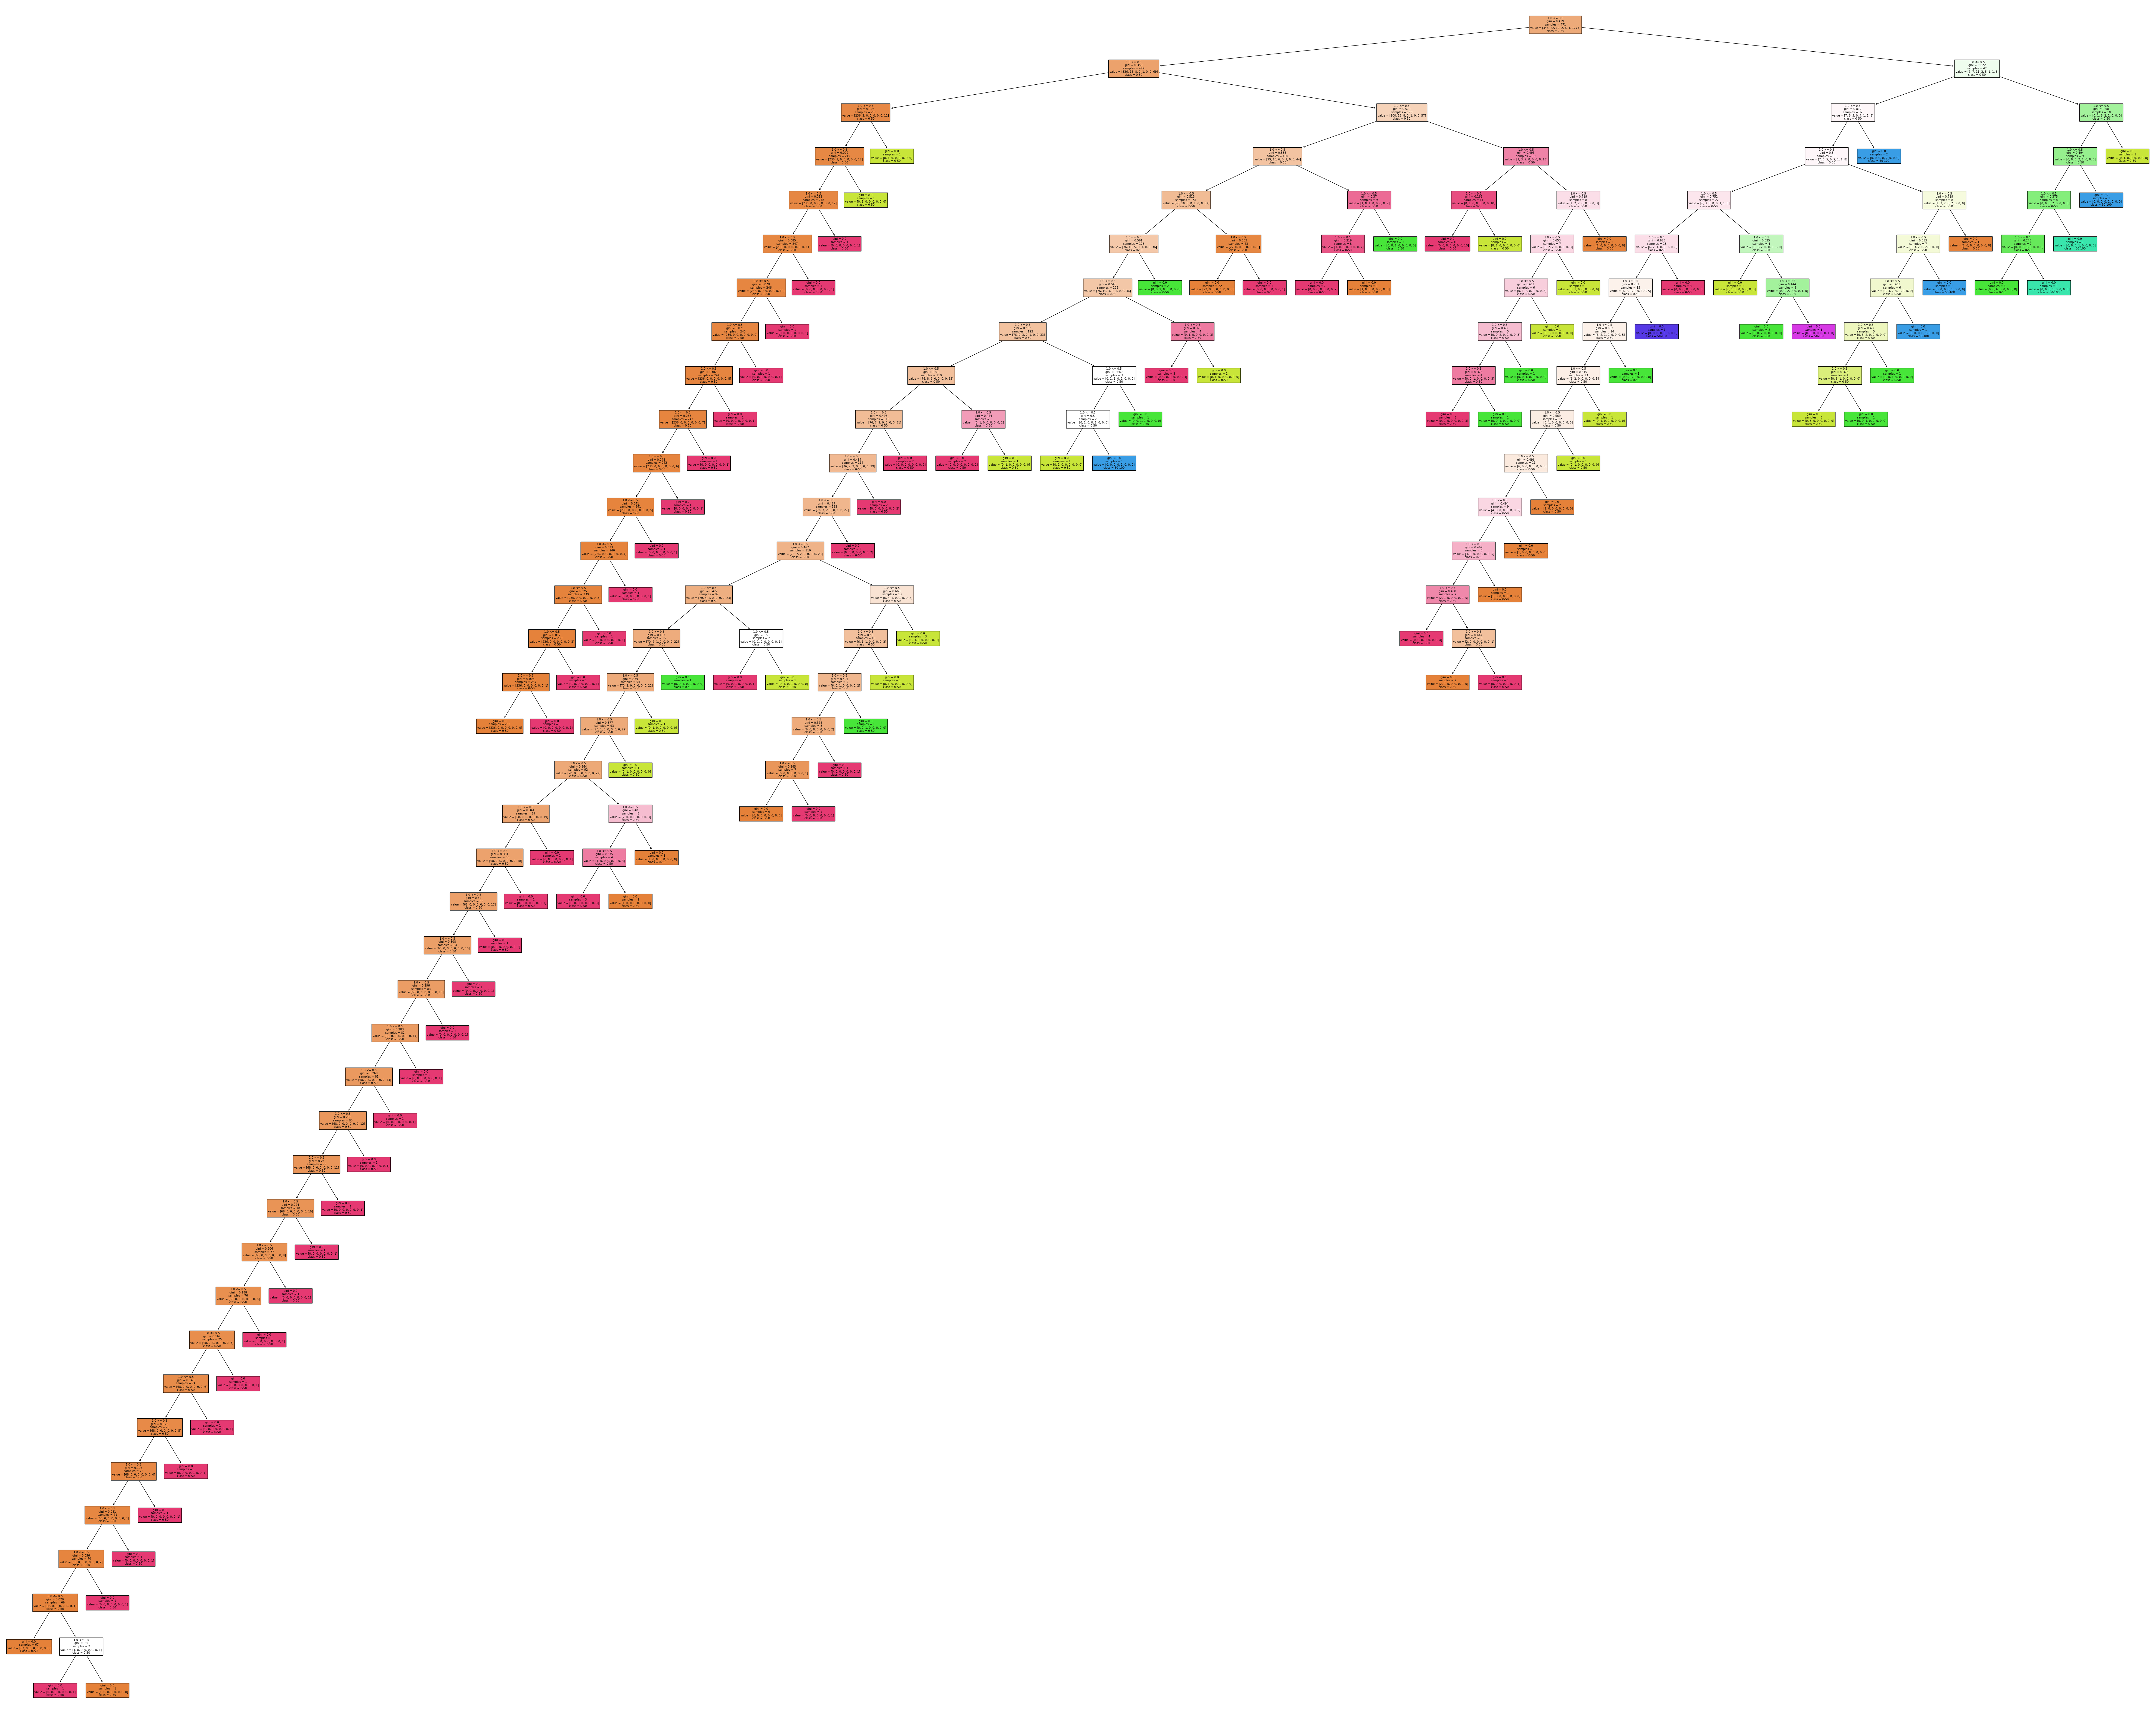

In [29]:
plot = plt.figure(figsize=(100,80))
_ = tree.plot_tree(dtc, feature_names=x.data,class_names=y,filled=True)

In [77]:
# set new features with dummy variable
features = ["piece_count", "Angry Birds™", "Architecture", "BOOST",
       "Blue's Helicopter Pursuit", "BrickHeadz", "City", "Classic", "Creator 3-in-1",
       "Creator Expert", "DC Comics™ Super Heroes", "DC Super Hero Girls",
       "DIMENSIONS™", "DUPLO®", "Dilophosaurus Outpost Attack", "Disney™",
       "Elves", "Friends", "Ghostbusters™", "Ideas", "Juniors",
       "Jurassic Park Velociraptor Chase", "MINDSTORMS®",
       "Marvel Super Heroes", "Minecraft™", "Minifigures", "NEXO KNIGHTS™",
       "NINJAGO®", "Power Functions", "Pteranodon Chase", "SERIOUS PLAY®",
       "Speed Champions", "Star Wars™", "Stygimoloch Breakout",
       "T. rex Transport", "THE LEGO® BATMAN MOVIE",
       "THE LEGO® NINJAGO® MOVIE™", "Technic", "Average", "Challenging",
       "Easy", "Very Easy"]

In [82]:
# recreate x/y train/test datasets with dummies for catagorical data
data = pd.read_csv("lego_sets.csv")
data.drop_duplicates("set_name",inplace=True)
data = data[data.country == "US"]
data = data.drop(["num_reviews","play_star_rating","prod_desc","prod_id","prod_long_desc","set_name","star_rating","val_star_rating","country","ages"],axis=1)
dummies = data["theme_name"].str.get_dummies()
data = pd.concat([data.drop(columns="theme_name"), dummies], axis=1)
dummies = data["review_difficulty"].str.get_dummies()
data = pd.concat([data.drop(columns="review_difficulty"), dummies], axis=1)
y = data["list_price"]
x = data[features]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [83]:
# fit and score linear regression
reg = LinearRegression().fit(x_train, y_train)
reg.score(x_test, y_test)

0.541540001264697

In [85]:
# see features with highest regression coefficient
pd.DataFrame(zip(x.columns, reg.coef_)).sort_values(by=[1],ascending=False).head(6)

,0,1
30,SERIOUS PLAY®,355.944262
3,BOOST,31.579483
22,MINDSTORMS®,29.080914
39,Challenging,20.626457
38,Average,11.971038
0,piece_count,0.080798
